In [1]:
# loading the required modules...
import json 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import contractions 
import string
import re

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("stopwords")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
STOPSWORD_ENG = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [6]:
import tensorflow as tf

In [7]:
# setiing plot style
plt.style.use("seaborn-v0_8-darkgrid")

In [8]:
# data location
data_loc = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\clinc150\clinc150\data_small.json"

In [9]:
# data read function 
def read_data(data_loc):
    # loading the data 
    with open(data_loc) as data:
        clinc150_small = json.load(data)
    # loading training, validation and testing sets from the file..
    # training data
    train_data = pd.DataFrame(clinc150_small["train"], 
                              columns=["Query", "Intent"])
    # validation data
    val_data = pd.DataFrame(clinc150_small["val"], 
                            columns=["Query", "Intent"])
    # testing data
    test_data = pd.DataFrame(clinc150_small["test"], 
                             columns=["Query", "Intent"])

    return train_data, val_data, test_data

In [10]:
train_df, val_df, test_df = read_data(data_loc)

In [11]:
# looking at the length of training data
print("The length of the training data: ", 
      len(train_df))
# looking at the length of testing data
print("The length of the testing data: ", 
      len(test_df))
# looking at the length of validation data
print("The length of the validation data: ", 
      len(val_df))

The length of the training data:  7500
The length of the testing data:  4500
The length of the validation data:  3000


In [12]:
class_length = len(train_df.iloc[:, 1].unique())

In [13]:
domains = {}

In [25]:
class eda():

    def __init__(self, data):
        self.data = data
        
    def null_check(self, title):
        self.data.isna().sum().plot(kind="bar",
                               title=title,
                               xlabel="Columns",
                               ylabel="No. of Null Values")
        plt.show()
    
    def query_per_class(self):
        return self.data.groupby(by="Intent").agg({"Query": "count"})
    
    def char_per_query(self, title):
        char_per_query_df = self.data["Query"].str.len()
        print("Minimum Number of Charaters in a query is: ", 
              char_per_query_df.min())
        print("Maximum Number of Charaters in a query is: ", 
              char_per_query_df.max())
        char_per_query_df.plot(kind="hist", 
                               title=f"Character per queries - {title}",
                               ylabel="Queries",
                               xlabel="No. of Charaters")
        plt.show()

    def word_per_query(self, title):
        word_per_query_df = self.data["Query"].str.split().str.len()
        print("Minimum Number of Words in a query is: ", 
              word_per_query_df.min())
        print("Maximum Number of Words in a query is: ", 
              word_per_query_df.max())
        word_per_query_df.plot(kind="hist", 
                               title=f"Words per queries - {title}",
                               ylabel="Queries",
                               xlabel="No. of Words")
        plt.show()

    def avg_word_len_per_query(self, title):
        avg_word_len_per_query = self.data["Query"].str.split().str.len()
        print("Minimum Number of Average Words Length in a query is: ", 
              avg_word_len_per_query.min())
        print("Maximum Number of Average Words Length in a query is: ", 
              avg_word_len_per_query.max())
        avg_word_len_per_query.plot(kind="hist", 
                                    title=f"Average Word length per queries - {title}",
                                    ylabel="Queries",
                                    xlabel="Average Word Length")
        plt.show()

In [26]:
eda_train = eda(train_df)
eda_val = eda(val_df)
eda_test = eda(test_df)

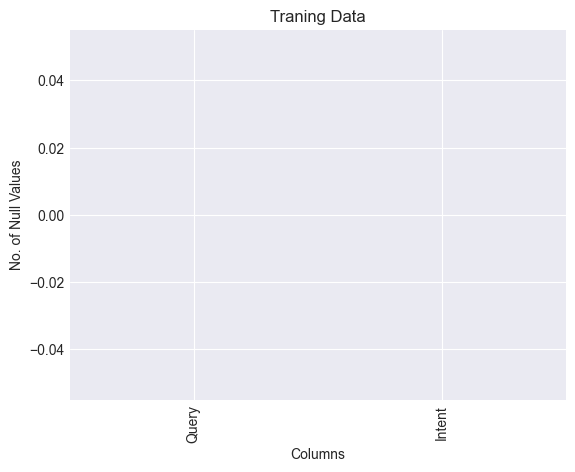

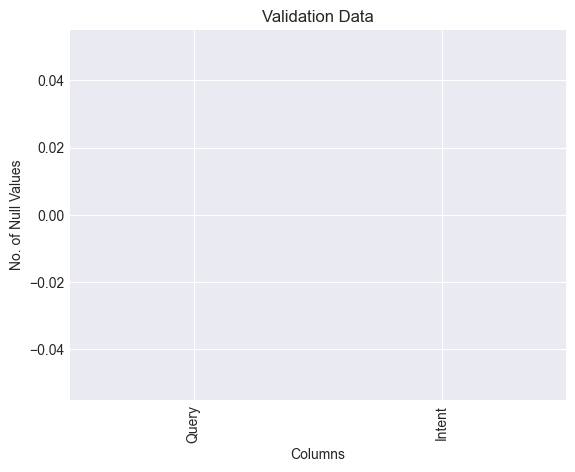

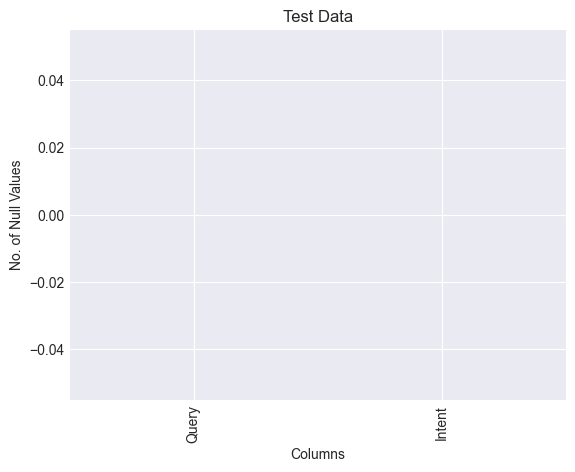

In [27]:
eda_train.null_check("Traning Data")
eda_val.null_check("Validation Data")
eda_test.null_check("Test Data")

In [36]:
eda_train.query_per_class()

,Query
Intent,
accept_reservations,50
account_blocked,50
alarm,50
application_status,50
apr,50
...,...
where_are_you_from,50
whisper_mode,50
who_do_you_work_for,50


In [34]:
eda_val.query_per_class()

,Query
Intent,
accept_reservations,20
account_blocked,20
alarm,20
application_status,20
apr,20
...,...
where_are_you_from,20
whisper_mode,20
who_do_you_work_for,20


In [35]:
eda_test.query_per_class()

,Query
Intent,
accept_reservations,30
account_blocked,30
alarm,30
application_status,30
apr,30
...,...
where_are_you_from,30
whisper_mode,30
who_do_you_work_for,30


Minimum Number of Charaters in a query is:  3
Maximum Number of Charaters in a query is:  136


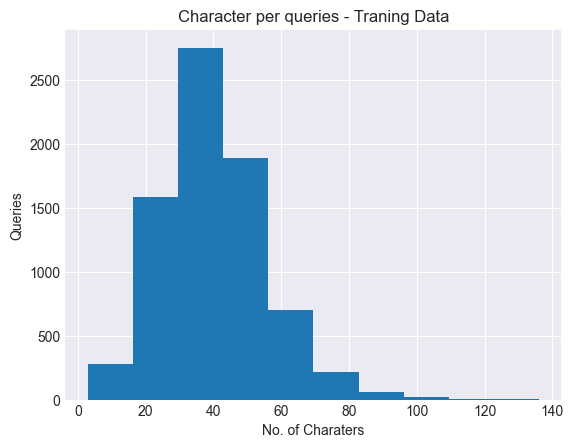

Minimum Number of Charaters in a query is:  2
Maximum Number of Charaters in a query is:  114


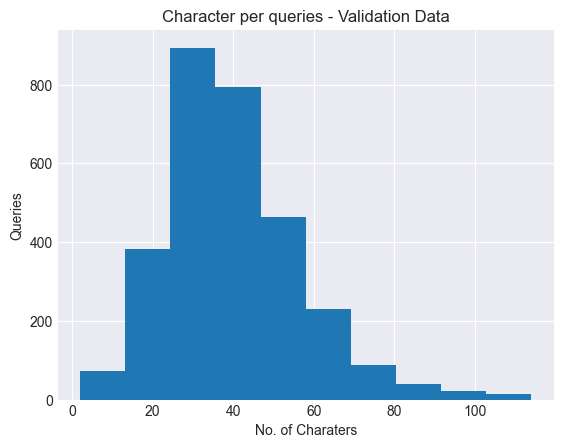

Minimum Number of Charaters in a query is:  2
Maximum Number of Charaters in a query is:  125


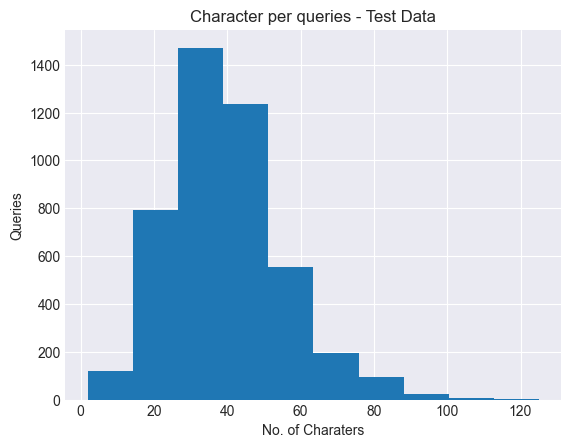

In [29]:
eda_train.char_per_query("Traning Data")
eda_val.char_per_query("Validation Data")
eda_test.char_per_query("Test Data")

Minimum Number of Words in a query is:  1
Maximum Number of Words in a query is:  28


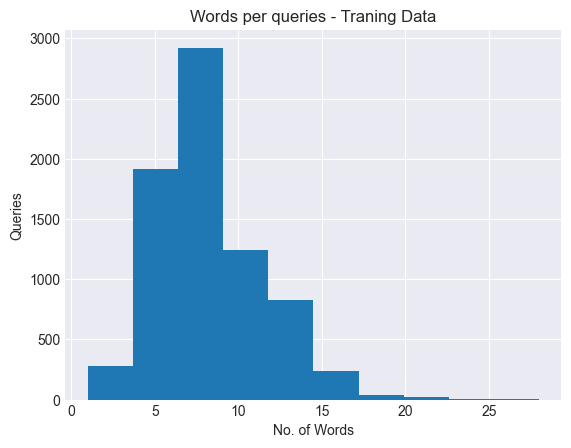

Minimum Number of Words in a query is:  1
Maximum Number of Words in a query is:  24


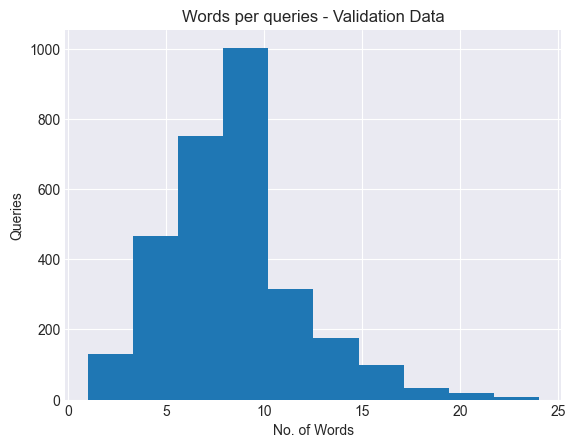

Minimum Number of Words in a query is:  1
Maximum Number of Words in a query is:  25


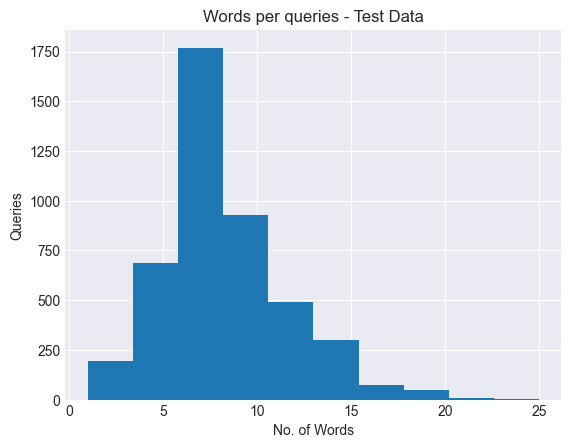

In [30]:
eda_train.word_per_query("Traning Data")
eda_val.word_per_query("Validation Data")
eda_test.word_per_query("Test Data")

Minimum Number of Average Words Length in a query is:  1
Maximum Number of Average Words Length in a query is:  28


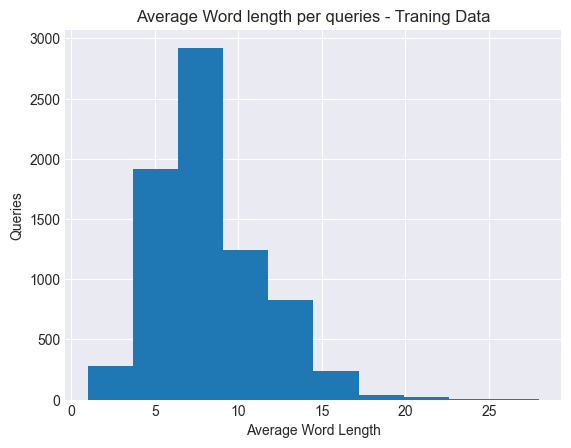

Minimum Number of Average Words Length in a query is:  1
Maximum Number of Average Words Length in a query is:  24


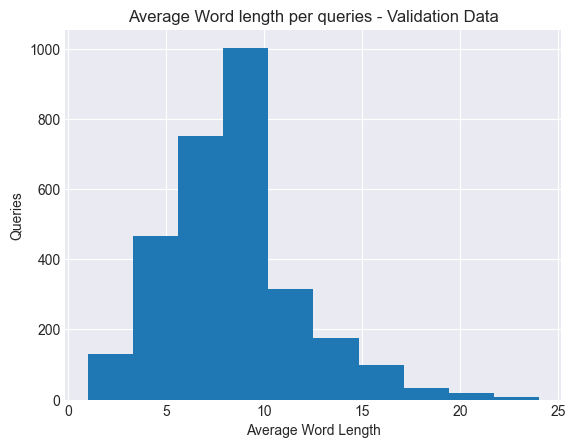

Minimum Number of Average Words Length in a query is:  1
Maximum Number of Average Words Length in a query is:  25


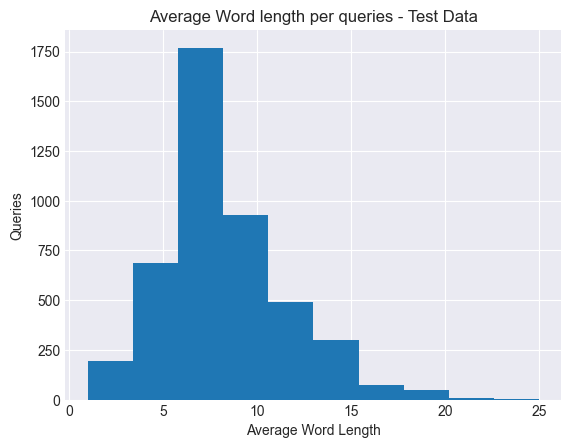

In [31]:
eda_train.avg_word_len_per_query("Traning Data")
eda_val.avg_word_len_per_query("Validation Data")
eda_test.avg_word_len_per_query("Test Data")

In [32]:
ohe = OneHotEncoder(handle_unknown="ignore")
# ohe.fit(train_df.iloc[:, 1].unique().reshape(class_length, 1))

In [ ]:
class pre_process():
    def __init__(self, data):
        self.x_data = data.iloc[:, 0]
        self.y_data = data[["Intent"]]

    def preprocess(self):
        # lowing the query
        # self.x_data = tf.strings.lower(self.x_data)
        self.x_data = self.x_data.apply(lambda query: query.lower())
        # expanding the contractions 
        self.x_data = self.x_data.apply(lambda query: contractions.fix(query))
        # removing the digits and alphanumerical words
        self.x_data = self.x_data.apply(lambda query: re.sub(r"\w*\d\w*", "", query))
        # removing punctuation from
        self.x_data = self.x_data.apply(lambda query: 
                                        query.translate(str.maketrans("", 
                                                                      "", 
                                                                      string.punctuation)))
        # removing english stopwords
        self.x_data = self.x_data.apply(lambda query: 
                                      " ".join(word for word in \
                                               query.split() if word not in STOPSWORD_ENG))

        return self.x_data
    
    def lemmatise(self):
        self.x_data =  self.x_data.apply(lambda query : 
                                       " ".join(lemmatizer.lemmatize(word) \
                                                for word in query.split()))
        return self.x_data
    
    def encode_class(self):
        return ohe.fit_transform(self.y_data).toarray()
        
    # def domain_map(self, domain=domians):